In [66]:
# Imports - collect all and move here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [115]:
data = pd.read_csv('mbti_1.csv')
pd.set_option('display.max_colwidth', None)
data.head(1)

type  \
0  INFJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [4]:
data.shape

(8675, 2)

In [5]:
data.type.value_counts() # All 16 types are represented but highly imbalanced

type
INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: count, dtype: int64

# Test sample - cleaning + topic modeling

In [ ]:
# Keyword extraction
import nltk
nltk.download('punkt')

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# Topic modeling - only for EDA and question generation
nltk.download('averaged_perceptron_tagger')

In [ ]:
# NOTE - need to add _ to regex_todrop

In [175]:
import re

# Testing on 1 post
test_post = data.posts[0].lower()

# Def function for removing ||| delimiters
def remove_delimiters(delimiters, s):
    new_s = s
    for i in delimiters:
        new_s = new_s.replace(i, ' ')
    return ' '.join(new_s.split())

test_post = remove_delimiters('|||', test_post)

# Dropping numbers - don't appear to have meaning and might mess up modeling later
test_post = ''.join([i for i in test_post if not i.isdigit()])

# Expressions to drop
regex_todrop = ['[.+]','[(+]','[+)]','[+/+]','[:+:]','[+?]','[+/+]','[+~]','[+,+]',
                "[+'+]",'[+-+]']

# First dropping URLs
text = re.sub(r"\S*https?:\S*", "", test_post) # Dropping URLs

# Drop regex
for r in regex_todrop:
    text = re.sub(r, "", text)

# Quick check on first 800 characters
text[:800]

'  enfp and intj moments  sportscenter not top ten plays  pranks what has been the most life-changing experience in your life   on repeat for most of today may the perc experience immerse you the last thing my infj friend posted on his facebook before committing suicide the next day rest in peace  hello enfj sorry to hear of your distress its only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as      welcome and stuff  game set match prozac wellbrutin at least thirty minutes of moving your legs and i dont mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative basically come up with three items youve determined that each type or whichever'

In [176]:
# Topic modelling
tokens = nltk.word_tokenize(text)
tkns = [w for w in tokens if len(w) >= 4]

tags = nltk.pos_tag(tkns)
nouns = [word for (word, tag) in tags if tag == 'NN']

tfidf = vectorizer.fit_transform(tkns)

sample1 = sorted(vectorizer.vocabulary_,
                 key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                 reverse = True)
print(sample1[:10])

['enfp', 'intj', 'moments', 'sportscenter', 'plays', 'pranks', 'what', 'been', 'most', 'life']


# Cleaning

In [ ]:
# Joining all text data - this took a long time lol
all_posts = ' '.join(data.posts)

# And dropping URLs
all_posts = re.sub(r"\S*https?:\S*", "", all_posts)

In [ ]:
# Dropping delimiters, numbers
all_cln = remove_delimiters('|||', all_posts)
all_cln = ''.join([i for i in all_cln if not i.isdigit()])

In [183]:
# Dropping regex
clean_text_all = all_cln

for r in regex_todrop:
    clean_text_all = re.sub(r, "", clean_text_all)

# Correcting case
clean_text_all = clean_text_all.lower()

# Quick check
clean_text_all[2000:3000]

'thing about peer pressure banned for a whole host of two baby deer on left and right munching on a beetle in the middle  using their own blood two cavemen diary todays latest happenings on their designated cave diary wall  i see it as a pokemon world an infj society everyone becomes an all artists are artists because they draw its the idea that counts in forming something of your own like a signature welcome to the robot ranks person who downed my self-esteem cuz im not an avid signature artist like herself proud banned for taking all the room under my bed ya gotta learn to share with the for being too much of a thundering grumbling kind of storm yep ahh old high school music i havent heard in ages failed a public speaking class a few years ago and ive sort of learned what i could do better were i to be in that position again a big part of my failure was just overloading myself with too i like this persons mentality hes a confirmed intj by the way to the denver area and start a new li

In [ ]:
# QUESTION - Drop MBTI types in text?

# EDA

# Topic modeling

In [ ]:
tokens = nltk.word_tokenize(clean_text_all) # full text

# Filtering for nouns
tags = nltk.pos_tag(tokens)
nouns = [word for (word, tag) in tags if tag == 'NN']

# Fit Tfidf to nouns only for topic modeling
tfidf = vectorizer.fit_transform(nouns)

all_nouns = sorted(vectorizer.vocabulary_,
                   key = lambda x: tfidf[0, vectorizer.vocabulary_[x]],
                   reverse = True)

In [184]:
from collections import Counter
uniq_nouns = Counter(all_nouns_filt).keys() # dict_keys

print(len(all_nouns), len(uniq_nouns))

66963 63167


In [ ]:
# For removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [194]:
top_100 = [n for n in all_nouns if len(n) >= 4][:200]
top_100 = [w for w in top_100 if w.lower() not in stop_words]
print(top_100)

['experience', 'repeat', 'today', 'perc', 'immerse', 'thing', 'infj', 'friend', 'facebook', 'peace', 'enfj', 'sorry', 'distress', 'relationship', 'perfection', 'time', 'moment', 'existence', 'growth', 'welcome', 'game', 'match', 'prozac', 'wellbrutin', 'dont', 'mean', 'desk', 'chair', 'weed', 'moderation', 'healthier', 'type', 'whatnot', 'video', 'note', 'death', 'someone', 'everyone', 'wait', 'confidence', 'world', 'youre', 'personalitywell', 'outlet', 'part', 'thread', 'backyard', 'roast', 'something', 'sentence', 'corner', 'health', 'class', 'nothing', 'peer', 'pressure', 'host', 'left', 'munching', 'beetle', 'middle', 'blood', 'wall', 'pokemon', 'society', 'idea', 'signature', 'robot', 'person', 'artist', 'room', 'share', 'kind', 'storm', 'school', 'music', 'speaking', 'sort', 'position', 'failure', 'mentality', 'intj', 'area', 'life', 'lack', 'example', 'girlfriend', 'environment', 'cowgirl', 'meaning', 'theory', 'hello', 'presence', 'wordplay', 'cheeky', 'balance', 'hand', 'coord

In [ ]:
from functools import reduce
posts_100 = list(data.posts[:1100])

In [245]:
topic_freq = {}

for topic in top_100[:20]:
    topic_freq.setdefault(topic, 0)

In [246]:
for post in posts_100:
    for topic in topic_freq.keys():
        if topic in post:
            topic_freq[topic] += 1
        else: pass

In [235]:
topic_freq

{'experience': 526,
 'repeat': 106,
 'today': 304,
 'perc': 262,
 'immerse': 10,
 'thing': 1084,
 'infj': 61,
 'friend': 897,
 'facebook': 55,
 'peace': 98}

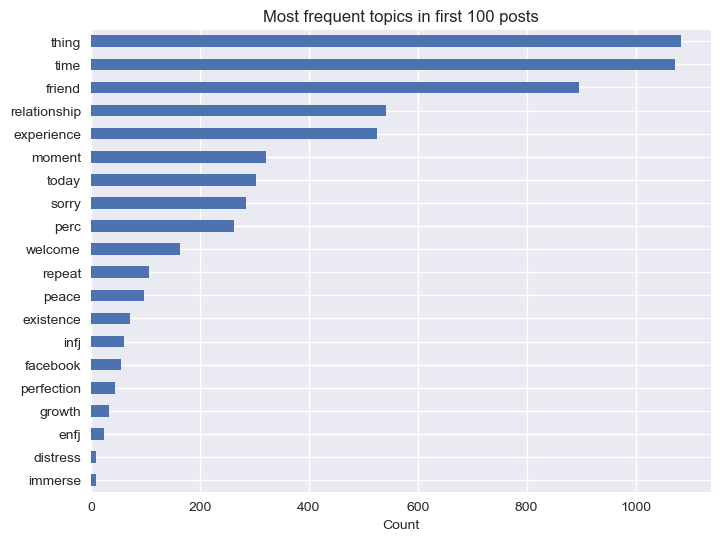

In [277]:
plt.style.use('seaborn-v0_8')

topics_df = pd.Series(topic_freq).to_frame()
topics_df.columns = ['count']
topics_df = topics_df.sort_values(by = 'count', ascending = True)

topics_df.plot.barh(figsize = (8,6), title = 'Most frequent topics in first 100 posts',
                    xlabel = 'Count', fontsize = 10, legend = False);

In [ ]:
# QUESTION - Some of these are not nouns?

# Wordcloud

In [ ]:
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import wordcloud
# ImportError: not valid for use in process: Trying to load an unsigned library

# Topics by type

In [ ]:
# Group by type and look at topics? EDA

# Next

- look up AllenNLP
- try SpaCy or Polyglot pos tagging vs. nltk
- look up sentence segmentation
- look up TextBlob (nltk) for phrase freq, spelling correction, classification
- look up Gensim for semantic search